In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df = df.copy()  # Ensure we are modifying the original DataFrame

# Fill missing values safely
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column only if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# Check missing values after cleaning
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## **Survival Rate**

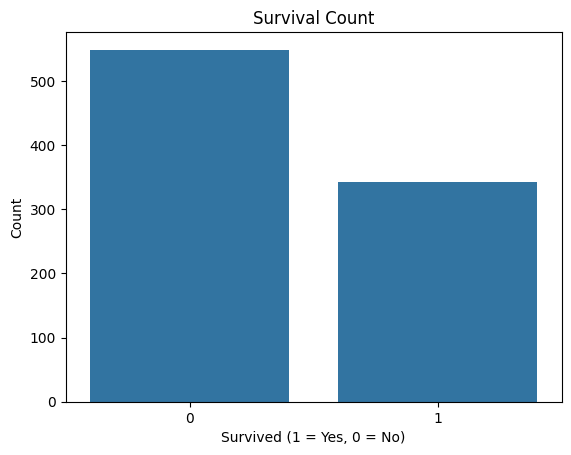

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for survival
sns.countplot(x=df['Survived'])
plt.title("Survival Count")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

A bar chart showing the number of survivors and non-survivors.

Survival Rate by Gender

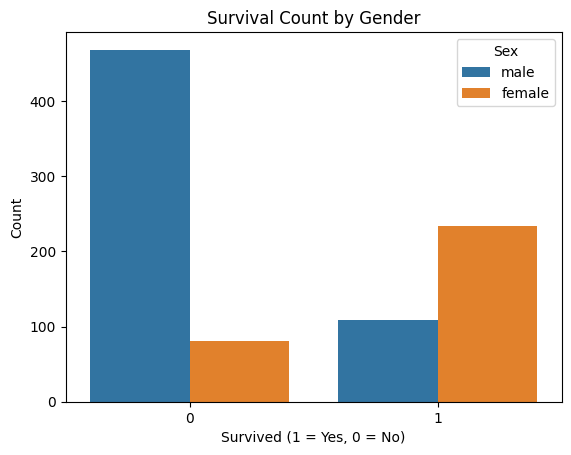

In [12]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

**Women** had a **higher survival rate** than men

## **Visualize Age Distribution**

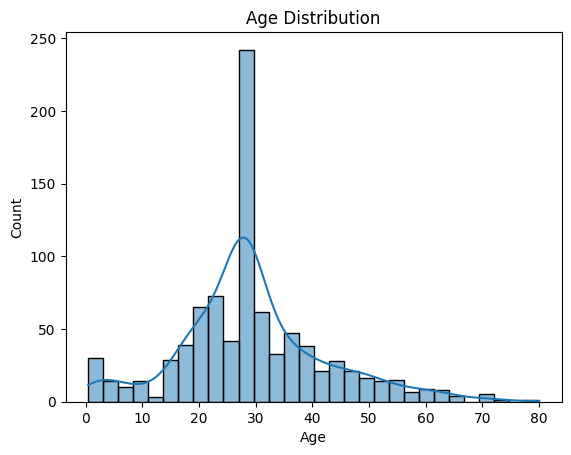

In [14]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Most passengers were between **20-40 years old**.

## **Age Distribution Insights**
- Most passsengers are between **20-40 years old**.
- There is a noticeable peak at **30 years** ,likely due to missing value imputation.
- Fewer passengers are **above 60 years old**.

 Survival Rate by Age

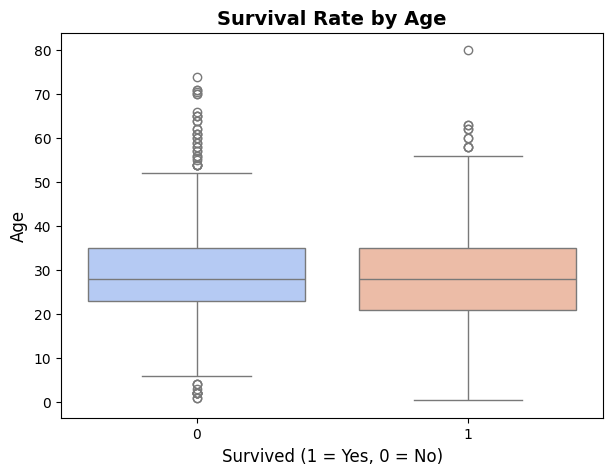

In [19]:
plt.figure(figsize=(7,5))

sns.boxplot(x="Survived", y="Age", data=df, hue="Survived", palette="coolwarm")

plt.title("Survival Rate by Age", fontsize=14, fontweight="bold")
plt.xlabel("Survived (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.show()


## **Survival Rate by Age**
- Younger passengers (children and teens) had a **higher survival rate**.
- Older passengers had a **lower survival rate**, possibly due to difficulty in escaping.

##  **Survival Rate by Passenger Class**

First,let's check how survival varied across different classes(1st,2nd, and 3rd class).

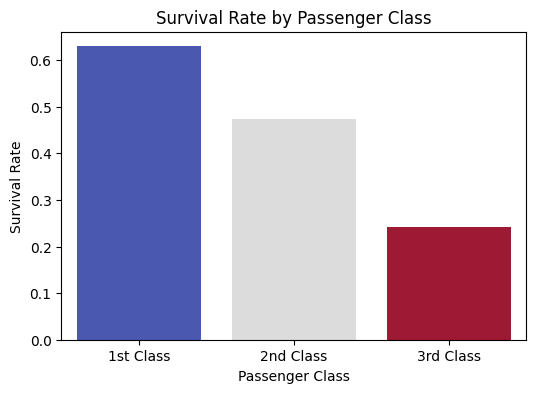

In [26]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, errorbar=None, palette="coolwarm", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks([0, 1, 2], ["1st Class", "2nd Class", "3rd Class"])
plt.show()


 * Passengers in **1st class** had the **highest survival rate**.
 * passengers in **3rd class** had the **lowest survival rate**.

##  **Survival by Gender & Class**

Instead of just looking at class alone, we can analyze **how survival varies for men and women across different classes**.

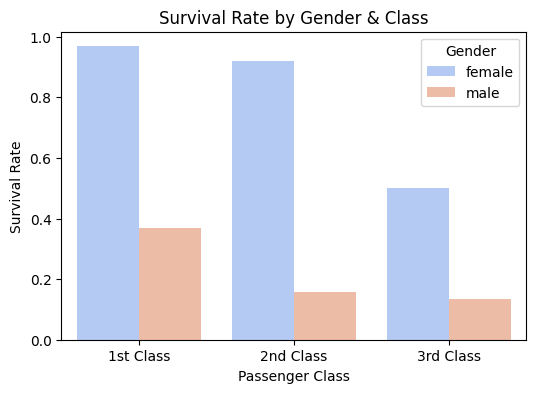

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df, errorbar=None, palette="coolwarm")
plt.title("Survival Rate by Gender & Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks([0, 1, 2], ["1st Class", "2nd Class", "3rd Class"])
plt.legend(title="Gender")
plt.show()


* **Women in 1st & 2nd class** had the **highest survival rate**.

* **Men in 3rd class** had the **lowest survival rate**.

* **Overall, higher-class passengers had better survival chances**.

## **1. Survival by Fare**

* Check if passengers who paid higher fares had a better survival rate.

* Use a boxplot or bar plot for visualization.


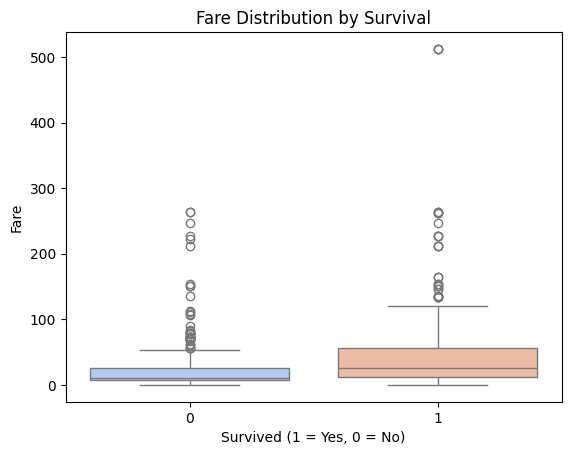

In [29]:
sns.boxplot(x=df["Survived"], y=df["Fare"], hue=df["Survived"], palette="coolwarm", legend=False)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Fare")
plt.show()


## **2. Survival by Embarkation Port**

* Analyze if the port of embarkation influenced survival.


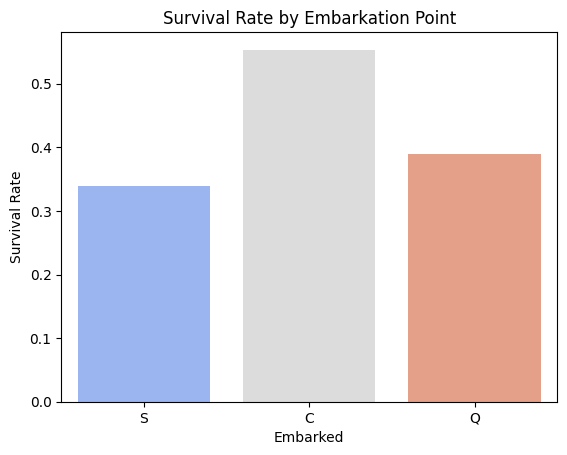

In [31]:
sns.barplot(x="Embarked", y="Survived", data=df, hue="Embarked", errorbar=None, palette="coolwarm", legend=False)
plt.title("Survival Rate by Embarkation Point")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()



## **3. Family Size and Survival**

* Combine SibSp (siblings/spouses) and Parch (parents/children) into a FamilySize column and check its impact.

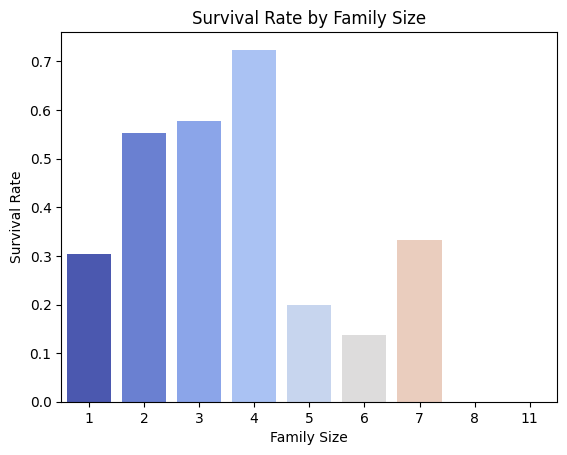

In [33]:
sns.barplot(x="FamilySize", y="Survived", data=df, hue="FamilySize", errorbar=None, palette="coolwarm", legend=False)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()



## **Feature Engineering**
Feature engineering helps improve model performance by creating new meaningful variables. Here’s what you should do:

## **1️ Extract Titles from Names**
Passengers' names contain titles like Mr., Miss., Mrs., etc. You can extract them as a new feature.

In [38]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)  # Extract titles
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Jonkheer', 'Don', 'Sir', 'Lady', 'Countess']
df.loc[:, 'Title'] = df['Title'].replace(rare_titles, 'Rare')  # Replace rare titles
df.loc[:, 'Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})  # Standardize

print(df['Title'].value_counts())  # Check the cleaned title counts


Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


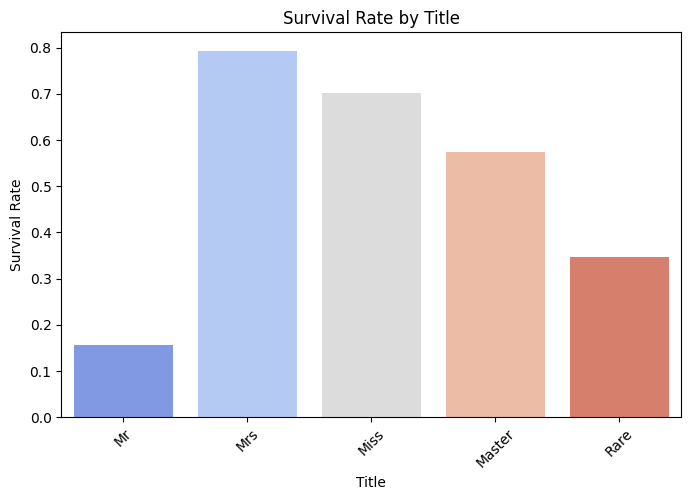

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Title', y='Survived', data=df, errorbar=None, hue="Title", palette="coolwarm", legend=False)
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()



## **Group Rare Titles**
Some titles appear very few times (e.g., Countess, Capt, Lady). You should group them into a single category like "Rare".

In [43]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Jonkheer', 'Don', 'Sir', 'Lady', 'Countess']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Title' column
title_encoder = LabelEncoder()
df['Title'] = title_encoder.fit_transform(df['Title'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation with survival
correlation = df_numeric.corr()['Survived'].sort_values(ascending=False)

print(correlation)



Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Title         -0.071174
Pclass        -0.338481
Name: Survived, dtype: float64


## **Create Age Groups**
* Instead of using raw age values, you can group them into categories.


In [47]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


 ## **Create Fare Categories**
 Since Fare varies a lot, grouping fares into ranges will make analysis easier.


In [48]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])


## **Family Size Categories**
Instead of using SibSp and Parch separately, create a FamilySize feature.

In [49]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilyGroup'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, 7, 11], labels=['Alone', 'Small', 'Medium', 'Large'])


In [50]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if any exist
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [51]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'Fare' and 'Age'
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')

# Verify outliers removed
print(f"Dataset shape after outlier removal: {df.shape}")


Dataset shape after outlier removal: (708, 17)


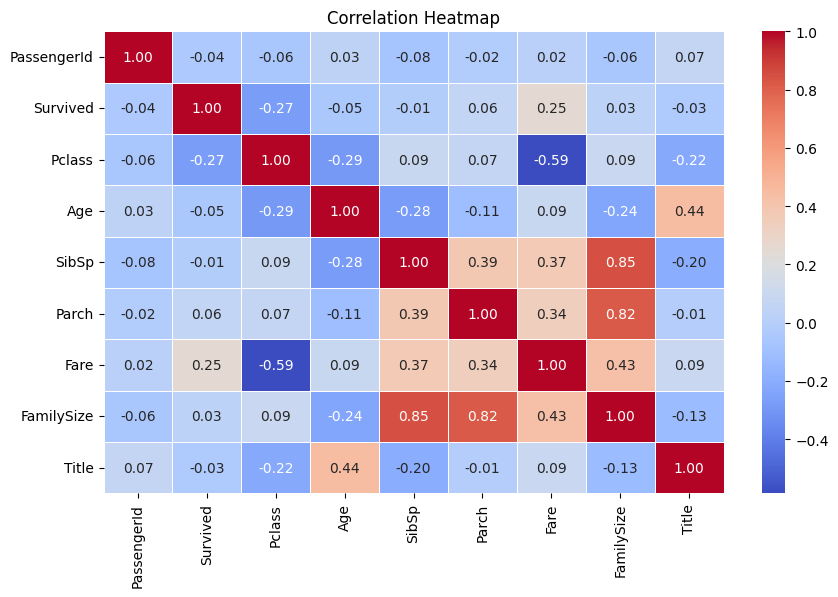

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Generate correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [55]:
df.to_csv("cleaned_titanic.csv", index=False)


##  **Summarize Insights**
Now, summarize your findings from the EDA.

## **Key Insights from the Titanic Dataset**
* Gender & Survival: Women had a significantly higher survival rate than men.

* Passenger Class: Higher-class passengers (1st class) had better survival rates compared to lower classes.

* Fare & Survival: Higher ticket fares correlate with a better chance of survival.

* Embarkation Point: Passengers from Cherbourg (C) had the highest survival rate.

* Family Size: Passengers with a family size between 2-4 had better survival rates, while those traveling alone had lower survival rates.